In [2]:
#traer librerias e importando datos
import numpy as np
import pandas as pd
from sklearn import cluster
import difflib
import matplotlib.pyplot as plt
movies_data = pd.read_csv('/content/Highest Holywood Grossing Movies.csv')

In [3]:
#numero de filas y columnas
movies_data.shape

(918, 11)

In [4]:
#imprimiendo algunos valors del dataseet
movies_data.head(15)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
5,5,Spider-Man: No Way Home (2021),"With Spider-Man's identity now revealed, Peter...",Sony Pictures Entertainment (SPE),NaN,675813257,868642706,1544455963,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 28 min,NaN
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13
8,8,The Avengers (2012),Earth's mightiest heroes must come together an...,Walt Disney Studios Motion Pictures,"April 25, 2012",623357910,895457605,1518815515,"['Action', 'Adventure', 'Sci-Fi']",2 hr 23 min,PG-13
9,9,Star Wars: Episode VIII - The Last Jedi (2017),The Star Wars saga continues as new heroes and...,Walt Disney Studios Motion Pictures,"December 13, 2017",620181382,712517448,1332698830,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 32 min,PG-13


In [5]:
#verificar si hay datos nulos
movies_data.isnull().sum()

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [6]:
#preprocesar los datos
# Eliminar filas con valores faltantes (NaN)
movies_data.dropna(inplace=True)
# Eliminar filas duplicadas
movies_data.drop_duplicates(inplace=True)
movies_data=movies_data.drop(['Unnamed: 0'], axis =1)

In [7]:
movies_data.head(15)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13
8,The Avengers (2012),Earth's mightiest heroes must come together an...,Walt Disney Studios Motion Pictures,"April 25, 2012",623357910,895457605,1518815515,"['Action', 'Adventure', 'Sci-Fi']",2 hr 23 min,PG-13
9,Star Wars: Episode VIII - The Last Jedi (2017),The Star Wars saga continues as new heroes and...,Walt Disney Studios Motion Pictures,"December 13, 2017",620181382,712517448,1332698830,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 32 min,PG-13
11,The Lion King (2019),"After the murder of his father, a young lion p...",Walt Disney Studios Motion Pictures,"July 11, 2019",543638043,1119261396,1662899439,"['Adventure', 'Animation', 'Drama', 'Family', ...",1 hr 58 min,PG
12,The Dark Knight (2008),When the menace known as the Joker wreaks havo...,Warner Bros.,"July 16, 2008",534858444,471115201,1005973645,"['Action', 'Crime', 'Drama', 'Thriller']",2 hr 32 min,PG-13
13,Rogue One: A Star Wars Story (2016),"In a time of conflict, a group of unlikely her...",Walt Disney Studios Motion Pictures,"December 14, 2016",532177324,523880396,1056057720,"['Action', 'Adventure', 'Sci-Fi']",2 hr 13 min,PG-13


In [8]:
movies_data.dtypes

Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [9]:
movies_data['License'].value_counts()

PG-13    363
R        194
PG       173
G         14
Name: License, dtype: int64

In [10]:
distribuidoras = {
    'Warner Bros.': '1',
    'Universal Pictures': '2',
    'Twentieth Century Fox': '3',
    'Walt Disney Studios Motion Pictures': '4',
    'Sony Pictures Entertainment (SPE)': '5',
    'Paramount Pictures': '6',
    'DreamWorks': '7',
    'New Line Cinema': '8',
    'Lionsgate': '9',
    'DreamWorks Distribution': '10',
    'Revolution Studios': '11',
    'TriStar Pictures': '12',
    'Miramax': '13',
    'Dimension Films': '14',
    'The Weinstein Company': '15',
    'Metro-Goldwyn-Mayer (MGM)': '16',
    'Summit Entertainment': '17',
    'Fox Searchlight Pictures': '18',
    'Columbia Pictures': '19',
    'Screen Gems': '20',
    'STX Entertainment': '21',
    'FilmDistrict': '22',
    'Focus Features': '23',
    'IFC Films': '24',
    'Artisan Entertainment': '25',
    'Sony Pictures Classics': '26',
    'Newmarket Films': '27',
    'United Artists Releasing': '28',
    'Relativity Media': '29',
    'Roadside Attractions': '30',
    'United Artists': '31'
}

movies_data['Distributor'] = movies_data['Distributor'].map(distribuidoras)

In [11]:
movies_data['License'] = movies_data['License'].replace({'PG-13': 1, 'R': 2, 'PG': 3,'G': 4})
movies_data.to_csv('movies.csv', index=False)

In [12]:
# Cargar el dataset
df = pd.read_csv('movies.csv')

df['Genre'] = df['Genre'].str.strip('[]').str.replace("'", "").str.split(', ')
df_genres = df['Genre'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0)
#df_genres = df_genres.astype(int)

# Obtener las columnas entre 'CRIME' y 'COMEDY'
columnas_eliminar = df_genres.columns[df_genres.columns.get_loc('Crime')+1 : df_genres.columns.get_loc('Comedy')]

# Eliminar las columnas
df_genres.drop(columnas_eliminar, axis=1)
df_genres = df_genres.astype(int)

df = pd.concat([df, df_genres], axis=1)

df.to_csv('movies_modificado.csv', index=False)

print(df_genres)

     Action  Adventure  Sci-Fi  Drama  Fantasy  Romance  Animation  Family  \
0         1          1       1      0        0        0          0       0   
1         1          1       1      1        0        0          0       0   
2         1          1       1      0        1        0          0       0   
3         0          0       0      1        0        1          0       0   
4         1          1       1      0        0        0          0       0   
..      ...        ...     ...    ...      ...      ...        ...     ...   
739       0          0       0      1        0        1          0       0   
740       0          0       0      1        0        1          0       0   
741       0          0       0      1        0        1          0       0   
742       0          0       0      0        0        0          0       0   
743       0          0       0      0        1        1          0       1   

     Musical  Crime  ...  Comedy  War  Biography  Mystery  Horr

In [13]:
df_genres.head(5)

,Action,Adventure,Sci-Fi,Drama,Fantasy,Romance,Animation,Family,Musical,Crime,...,Comedy,War,Biography,Mystery,Horror,Sport,Music,History,Western,Documentary
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nuevo Dataseet

In [14]:
from sklearn.cluster import KMeans
movies = pd.read_csv('/content/movies_modificado.csv')
movies.head(5)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,...,Comedy,War,Biography,Mystery,Horror,Sport,Music,History,Western,Documentary
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",4,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,1,...,0,0,0,0,0,0,0,0,0,0
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,4,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,1,...,0,0,0,0,0,0,0,0,0,0
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,3,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,1,...,0,0,0,0,0,0,0,0,0,0
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,6,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,1,...,0,0,0,0,0,0,0,0,0,0
4,Jurassic World (2015),"A new theme park, built on the original site o...",2,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       744 non-null    object
 1   Movie Info                  744 non-null    object
 2   Distributor                 744 non-null    int64 
 3   Release Date                744 non-null    object
 4   Domestic Sales (in $)       744 non-null    int64 
 5   International Sales (in $)  744 non-null    int64 
 6   World Sales (in $)          744 non-null    int64 
 7   Genre                       744 non-null    object
 8   Movie Runtime               744 non-null    object
 9   License                     744 non-null    int64 
 10  Action                      744 non-null    int64 
 11  Adventure                   744 non-null    int64 
 12  Sci-Fi                      744 non-null    int64 
 13  Drama                       744 non-null    int64 

In [16]:
movies.Genre.value_counts()

['Action', 'Adventure', 'Sci-Fi']                                   51
['Comedy']                                                          31
['Comedy', 'Romance']                                               28
['Action', 'Adventure', 'Thriller']                                 22
['Comedy', 'Drama', 'Romance']                                      21
                                                                    ..
['Comedy', 'Drama', 'Family', 'Fantasy']                             1
['Action', 'Adventure', 'Comedy', 'Family', 'Mystery', 'Sci-Fi']     1
['Adventure', 'Animation', 'Drama', 'Family', 'Fantasy']             1
['Comedy', 'Drama', 'Fantasy', 'Romance']                            1
['Comedy', 'Family', 'Fantasy', 'Romance']                           1
Name: Genre, Length: 257, dtype: int64

In [17]:
movies.Distributor.value_counts()

1     126
2     107
3     103
4      98
5      96
6      77
7      19
8      17
9      16
10     15
11      8
12      8
13      8
14      7
15      5
16      5
17      5
18      3
19      3
20      3
21      3
22      2
23      2
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
Name: Distributor, dtype: int64

In [26]:
from sklearn.metrics import silhouette_score

num_clusters = [3]#, 3, 4, 5, 6, 7, 8]
# Seleccionar las columnas relevantes para aplicar K-Means
columnas = ['Distributor', 'Domestic Sales (in $)', 'International Sales (in $)', 'World Sales (in $)', 'License', 
            'Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Romance', 'Animation', 'Family', 'Musical', 'Crime', 'Thriller',
            'Comedy', 'War', 'Biography', 'Mystery', 'Horror', 'Sport', 'Music', 'History', 'Western', 'Documentary']

for r in range(1,30): #Se colocan diferentes random state para diferentes valores de semilla
   Silueta = []
   K = []
   for num in num_clusters:
    k_means = cluster.KMeans(n_clusters=num,init='k-means++',max_iter=100,tol=0.0001,random_state = r)    

# Entrenar el modelo de K-Means con los datos
    k_means.fit(movies[columnas])

# Obtener las etiquetas de los clusters asignados a cada muestra
    etiquetas1 = k_means.labels_

# Agregar las etiquetas al DataFrame original
    movies['Cluster1'] = etiquetas1

    #Silueta.append(silhouette_score(movies[columnas],etiquetas1,metric = 'euclidean'))
    #K.append(num)
   #plt.plot(K,Silueta)
#plt.show()
# Calcular el coeficiente de silueta
coef_silueta1 = silhouette_score(movies[columnas], etiquetas1)

# Imprimir el coeficiente de silueta
print(f"Coeficiente de Silueta: {coef_silueta1}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Coeficiente de Silueta: 0.14237735469236365


In [21]:
from sklearn.cluster import AgglomerativeClustering

# Crear una instancia de AgglomerativeClustering con los argumentos deseados

aglomerativo = AgglomerativeClustering(n_clusters = 2,
                                       affinity = 'euclidean',
                                       linkage = 'ward',
                                       compute_full_tree = 'auto',
                                       connectivity = None,
                                       distance_threshold = None)

# Realizar el agrupamiento jerárquico con los datos
etiquetas2 = aglomerativo.fit_predict(movies[columnas])

# Agregar las etiquetas al DataFrame original
movies['Cluster2'] = etiquetas2

# Calcular el coeficiente de silueta
coef_silueta2 = silhouette_score(movies[columnas], etiquetas2)

# Imprimir el coeficiente de silueta
print(f"Coeficiente de Silueta: {coef_silueta2}")


Coeficiente de Silueta: 0.6870275748396851


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [22]:
from sklearn.preprocessing import StandardScaler

# Extraer el conjunto de entrenamiento
entrenamiento = movies[columnas]

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Calcular los dos momentos iniciales (media y desviación estándar) del conjunto de entrenamiento
scaler.fit(entrenamiento)

# Normalizar los datos del conjunto de entrenamiento
entrenamiento_normalizado = scaler.transform(entrenamiento)

# Crear un nuevo DataFrame con los datos normalizados
df_entrenamiento_normalizado = pd.DataFrame(entrenamiento_normalizado, columns=columnas)

movies.update(df_entrenamiento_normalizado)

# Imprimir el conjunto de entrenamiento normalizado
print(df_entrenamiento_normalizado)


     Distributor  Domestic Sales (in $)  International Sales (in $)  \
0      -0.215383               7.408018                    4.084833   
1      -0.215383               6.652114                    7.758328   
2      -0.431931               5.707197                    8.430865   
3       0.217712               4.730627                    5.950237   
4      -0.648478               4.663249                    3.562111   
..           ...                    ...                         ...   
739    -0.215383              -0.853086                   -0.616490   
740     0.650807              -0.853619                   -0.908935   
741     0.001164              -0.857749                   -0.511607   
742     0.650807              -0.857772                   -0.954593   
743     0.001164              -0.859807                   -0.668923   

     World Sales (in $)   License    Action  Adventure    Sci-Fi     Drama  \
0              5.387017 -0.904307  1.081248   1.093019  1.713624 -0.6

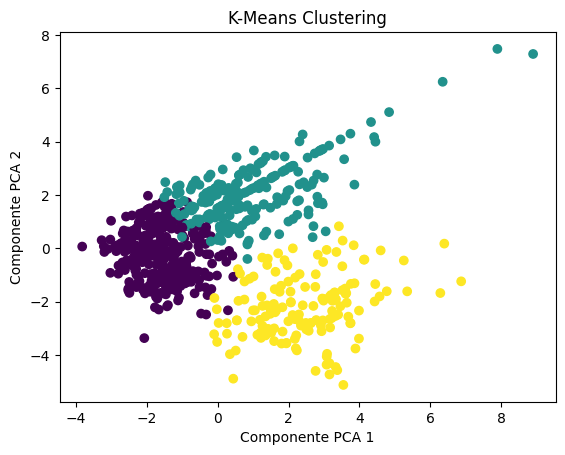

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Calcular la varianza explicada por cada componente principal
pca = PCA()
pca.fit(movies[columnas])
varianza_explicada = pca.explained_variance_ratio_

# Determinar el número de componentes necesarios para conservar cierta varianza
varianza_deseada = 0.97
n_componentes = 0
varianza_acumulada = 0.0

for i, varianza in enumerate(varianza_explicada):
    varianza_acumulada += varianza
    n_componentes += 1
    if varianza_acumulada >= varianza_deseada:
        break

# Aplicar PCA con el número de componentes necesarios
pca = PCA(n_components=n_componentes)
componentes_pca = pca.fit_transform(movies[columnas])


# Crear un gráfico de dispersión para visualizar los clusters
plt.scatter(componentes_pca[:, 0], componentes_pca[:, 1], c=etiquetas1, cmap='viridis')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.title('K-Means Clustering')
plt.show()


In [30]:
movies.head(6)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,...,Biography,Mystery,Horror,Sport,Music,History,Western,Documentary,Cluster1,Cluster2
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",-0.215383,"December 16, 2015",7.408018,4.084833,5.387017,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,-0.904307,...,-0.228766,-0.324804,-0.241498,-0.174559,-0.174559,-0.170428,-0.110657,-0.051917,1,0
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,-0.215383,"April 24, 2019",6.652114,7.758328,7.744295,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,-0.904307,...,-0.228766,-0.324804,-0.241498,-0.174559,-0.174559,-0.170428,-0.110657,-0.051917,1,0
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,-0.431931,"December 16, 2009",5.707197,8.430865,7.905374,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,-0.904307,...,-0.228766,-0.324804,-0.241498,-0.174559,-0.174559,-0.170428,-0.110657,-0.051917,1,0
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,0.217712,"December 19, 1997",4.730627,5.950237,5.814854,"['Drama', 'Romance']",3 hr 14 min,-0.904307,...,-0.228766,-0.324804,-0.241498,-0.174559,-0.174559,-0.170428,-0.110657,-0.051917,1,0
4,Jurassic World (2015),"A new theme park, built on the original site o...",-0.648478,"June 10, 2015",4.663249,3.562111,4.094995,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,-0.904307,...,-0.228766,-0.324804,-0.241498,-0.174559,-0.174559,-0.170428,-0.110657,-0.051917,1,0
5,The Avengers (2012),Earth's mightiest heroes must come together an...,-0.215383,"April 25, 2012",4.382979,3.003191,3.603771,"['Action', 'Adventure', 'Sci-Fi']",2 hr 23 min,-0.904307,...,-0.228766,-0.324804,-0.241498,-0.174559,-0.174559,-0.170428,-0.110657,-0.051917,1,0


In [31]:
movies.Cluster1.value_counts()

0    369
1    220
2    155
Name: Cluster1, dtype: int64

In [32]:
movies.Cluster2.value_counts()

1    626
0    118
Name: Cluster2, dtype: int64